<a href="https://colab.research.google.com/github/gshreya5/colab/blob/main/iris_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using KNN Model on iris dataset

## **Loading the Iris dataset from Scikit-learn**

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
iris = load_iris()

**iris dataset has features (columns) that have a corresponding target value (response). Target is what we need to predict.**

In [ ]:
iris.feature_names,iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

Classification is supervised learning in which the response is categorical.
For ML we need,
* features, target data
* both need to to be numerical and numpy arrays
* both need to be matching in shapes i.e. that is matching in observations



In [ ]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [ ]:
target = iris.target
features = iris.data

In [ ]:
target.dtype

dtype('int64')

In [ ]:
df = pd.DataFrame(features,columns = iris.feature_names ).join(pd.DataFrame(target,columns =['target'] ))

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Let's check relationship b/w features and targets using graphs

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

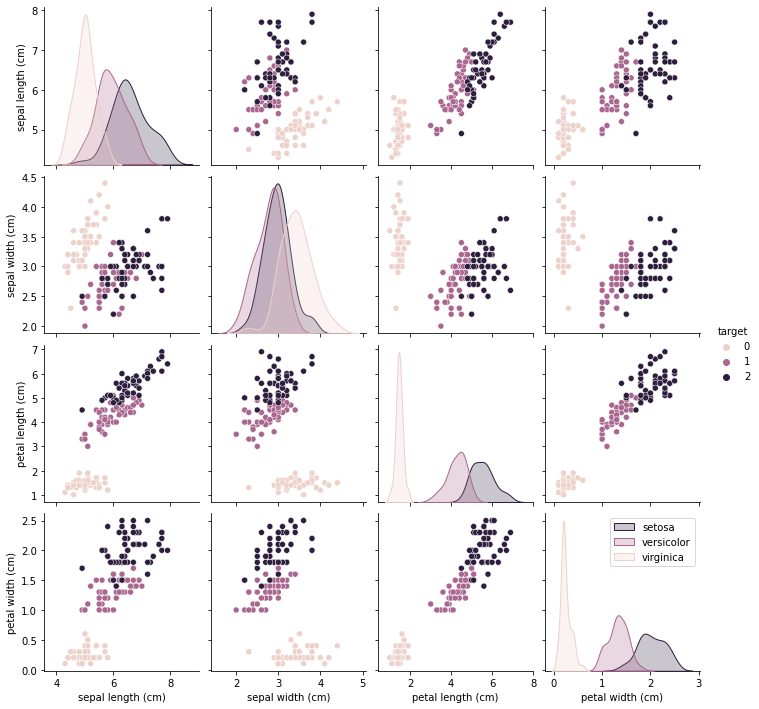

In [ ]:
sns.pairplot(df,hue='target')
plt.legend(iris.target_names);

# Using KNN (nearest neighbour) Algorithm
It determines nearest neighbours based on euclidean distance and decides based on clusters where the new data point (target of to_be_predicted features) belongs in category A or category B (classification)

split data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier() # default: n_neighbors=5, metric='minkowski', p=2
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
pred_y = clf.predict(x_test)

### Lets check accuracy by creating the Confusion matrix  

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm =confusion_matrix(y_test,pred_y,labels=[1,2,3])

In [ ]:
cm

array([[12,  1,  0],
       [ 0,  6,  0],
       [ 0,  0,  0]])

In [ ]:
clf.score(x_test,y_test)

0.9666666666666667

In [ ]:
import numpy as np

In [ ]:
#accuracy
np.mean(y_test==pred_y)

0.9666666666666667